In [45]:
library(xlsx)
library(ggplot2)
library(dplyr) # for renaming columns

In [89]:
df = read.xlsx("EsperancaVida.xlsx", sheetName = "Quadro")
df <- df[8:69, 1:250]
colnames(df) <- df[1,] # set the column names to the first row
df <- df[-1, ]
df <- data.frame(df, row.names = 1)
df <- type.convert(df, as.is = TRUE)
df <- df[, c("IT...Itália", "CY...Chipre","LT...Lituânia", "IT...Itália.2", "CY...Chipre.2","LT...Lituânia.2")]
df <- rename(df, "Itália_H" = "IT...Itália", "Chipre_H" = "CY...Chipre", "Lituânia_H" = "LT...Lituânia")
df <- rename(df, "Itália_M" = "IT...Itália.2", "Chipre_M" = "CY...Chipre.2", "Lituânia_M" = "LT...Lituânia.2")
vec <- seq(from = 2002, to = 2019, by = 1)
vec <- as.character(vec)
df <- df[vec, ]

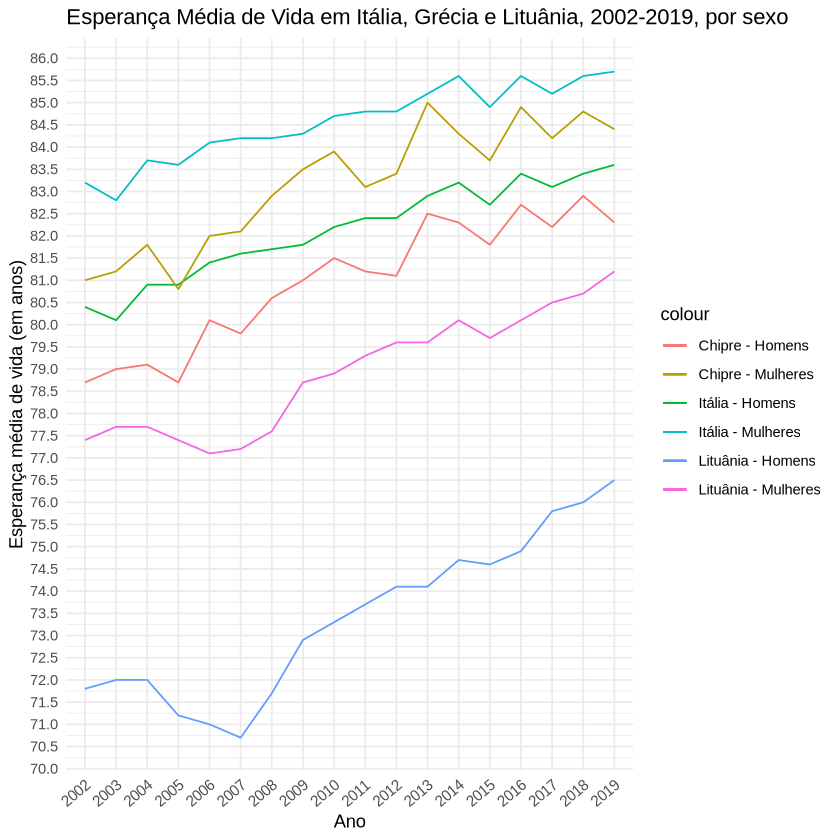

In [90]:
ggplot(df, aes(x = vec, group = 1)) +
  geom_line(aes(y = Itália_H, color = "Itália - Homens")) +
  geom_line(aes(y = Chipre_H, color = "Chipre - Homens"))+
  geom_line(aes(y = Lituânia_H, color = "Lituânia - Homens")) +
  geom_line(aes(y = Itália_M, color = "Itália - Mulheres")) +
  geom_line(aes(y = Chipre_M, color = "Chipre - Mulheres"))+
  geom_line(aes(y = Lituânia_M, color = "Lituânia - Mulheres")) +
  labs(x = "Ano", y = "Esperança média de vida (em anos)") +
  ggtitle("Esperança Média de Vida em Itália, Grécia e Lituânia, 2002-2019, por sexo") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 40, hjust=1)) +
  scale_y_continuous(breaks = round(seq(from = 68, to = 90, by = 0.5),0.5))